# Удержание клиентов сети фитнес-центров

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Индикаторы оттока зависят от специфики отрасли. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

**План работы**

- **Шаг 1. Откроем файлы с данными, изучим общую информацию и подготовим данные**

    Путь к файлу:
    -  /datasets/gym_churn.csv
    
    Неоходимо убедититься, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработать их.
     
    
- **Шаг 2. Проведем исследовательский анализ данных (EDA)**

    - Выясним есть ли в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения (используя метод `describe()`);
    - Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (используя метод `groupby()`);
    - Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
    - Построим матрицу корреляций и отобразим её.
    
    
- **Шаг 3. Построение модели прогнозирования оттока клиентов**

    Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    - Разобъем данные на обучающую и валидационную выборку функцией `train_test_split()`;
    - Обучим модель на train-выборке двумя способами:
      - логистической регрессией,
      - случайным лесом;
    - Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выясним, какая модель показала себя лучше на основании метрик.
         
      
- **Шаг 4. Проведение кластеризации клиентов**
    
    Проведем кластеризацию объектов (клиентов):
    - Стандартизируем данные;
    - Построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика сделаем предположение, какое количество кластеров можно выделить;
    - Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять `n=5`, чтобы результаты можно было сравнивать с результатами остальных студентов;
    - Изучим средние значения признаков для кластеров. Сделаем выводы;
    - Построим распределения признаков для кластеров. Сделаем выводы;
    - Для каждого полученного кластера посчитаем долю оттока (методом `groupby()`). Выясним, отличаются ли они по доле оттока и какие кластеры склонны к оттоку, а какие — надёжны.


- **Шаг 5. Сформулируем выводы и сделаем базовые рекомендации по работе с клиентами**


- **Описание данных**

   Файл `/datasets/gym_churn.csv` (данные на месяц до оттока и факт оттока на определённый месяц):

    - Данные клиента за предыдущий до проверки факта оттока месяц:
       - `gender` — пол
       - `Near_Location` — проживание или работа в районе, где находится фитнес-центр
       - `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
       - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
       - `Phone` — наличие контактного телефона
       - `Age` — возраст
       - `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах)
       
    - Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
       - `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год)
       - `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах)
       - `Group_visits` — факт посещения групповых занятий
       - `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента
       - `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц
       - `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон
              
  - `Churn` — факт оттока в текущем месяце

## Загрузка данных и подготовка их к анализу
Загрузим данные в переменную. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный. Путь к файлу:

 -   /datasets/gym_churn.csv.

### Обзор данных

Откроем таблицу и посмотрим общую информацию о ней.

In [1]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# чтение файла с данными и сохранение в переменной
pth1 = '/datasets/gym_churn.csv'
pth2 = 'C:/Users/tatar/downloads/gym_churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
# вывод первых 5 строк таблицы
display(df.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Проверим, есть ли в исходном датафрейме дублирующиеся строки.

In [4]:
# подсчет дублирующихся строк в таблице
df.duplicated().sum()

0

**Выводы**

* Необходимо заменить названия столбцов, привести их к нижнему регистру;
* Пропуски отсутствуют;
* Типы данных корректные;
* Дублирующиеся строки отсутствуют.

### Предобработка данных

Приведём к нижнему регистру названия столбцов.

In [5]:
df.rename(str.lower, axis='columns', inplace=True) # переименование столбцов
df.columns # проверка

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**Выводы**

Названия столбцов приведены к нижнему регистру, потребность в дополнительной предобработке данных при необходимости будет выявлена на последующих шагах.

## Исследовательский анализ данных (EDA)

Выясним есть ли в датасете отсутствующие признаки, изучим средние значения и стандартные отклонения.

In [6]:
# вывод характерных значений признаков и целевой переменной
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Выводы**

* Распределение по полу примерно одинаково;
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом;
* Примерно половина клиентов являются сотрудниками партнерских организаций;
* Около 30% клиентов пришли по программе "Приведи друга";
* Известны мобильные номера примерно 90% клиентов;
* Средняя длительность абонементов клиентов - 4.6 месяцев;
* Около 40% клиентов посещают групповые занятия;
* Средний возраст клиентов 29 лет;
* Средние дополнительные расходы на клиента - 146;
* Средний срок до окончания договора - 4.3 месяцев;
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
* Средняя частота посещений за все время - 1.87 раз в неделю;
* Средняя частота посещений за последний месяц - 1.76 раз в неделю.


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
# вывод средних значений признаков
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Выводы**

На основании отличий признаков у клиентов, попавших в отток и оставшихся можно сказать следующее
* Распределение по полу не отличается;
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично;
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты;
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
* Наличие мобильного номера клиента не отличается в группах;
* Средняя длительность договора больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (скорее это говорит о том, что чаще клиенты заключают договор на 1 месяц);
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них);
* У групп есть разница в среднем возрасте клиентов;
* Есть небольшое различие в выручке от других услуг фитнес-центра;
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов;
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

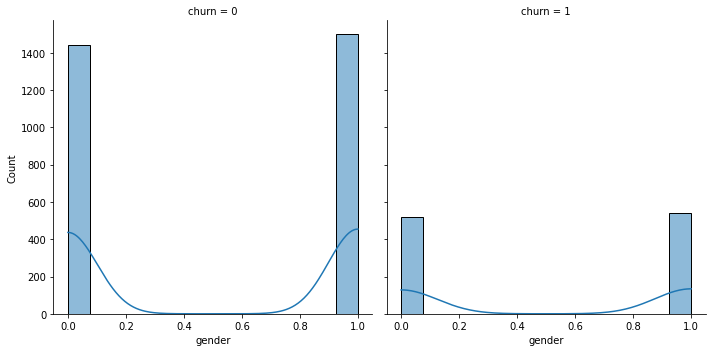

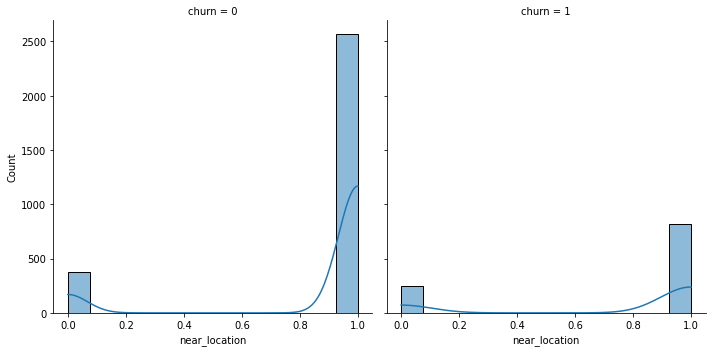

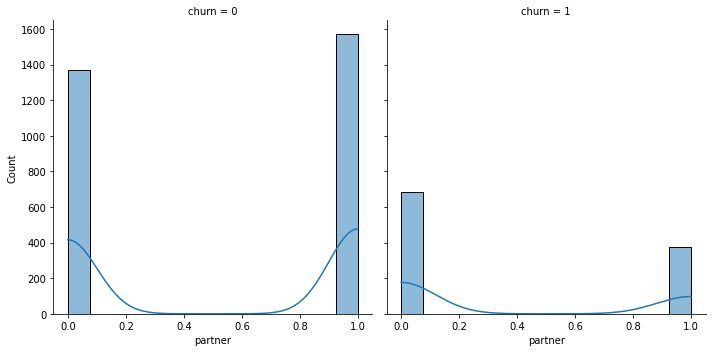

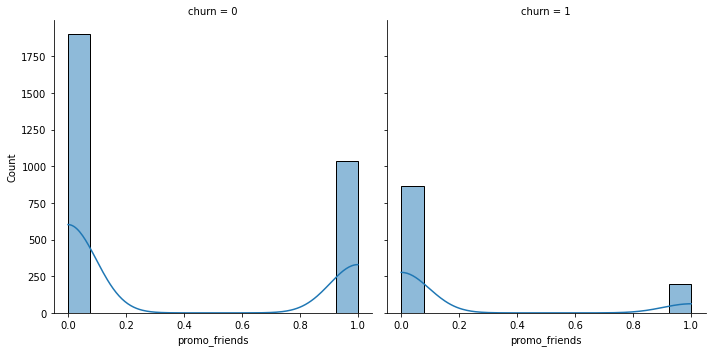

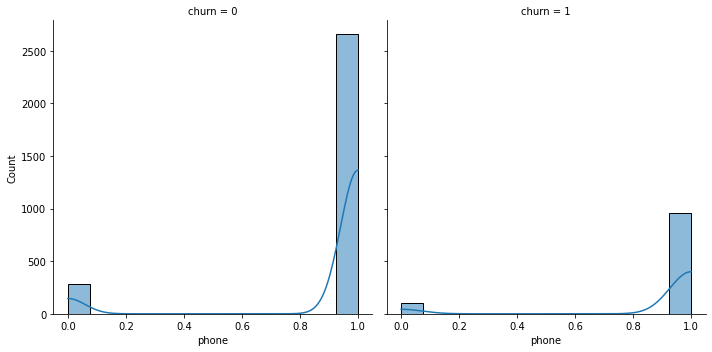

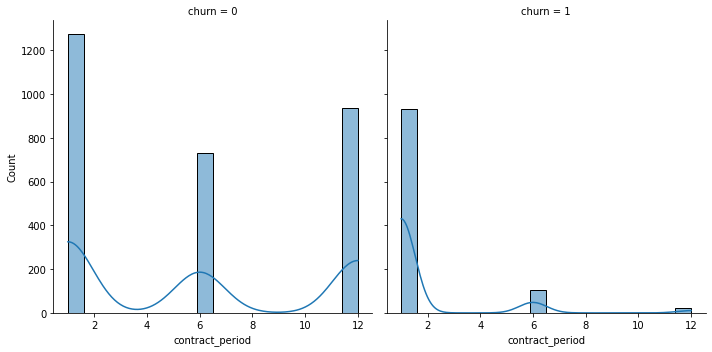

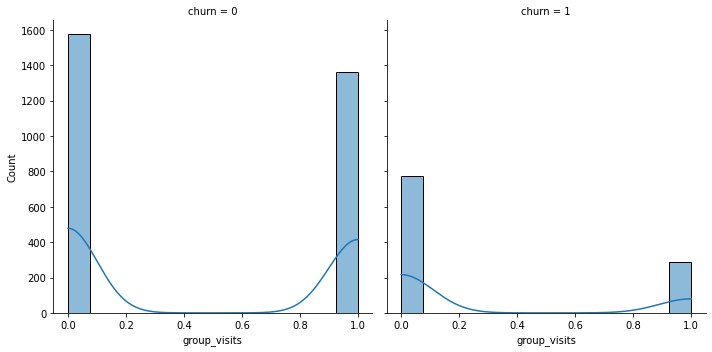

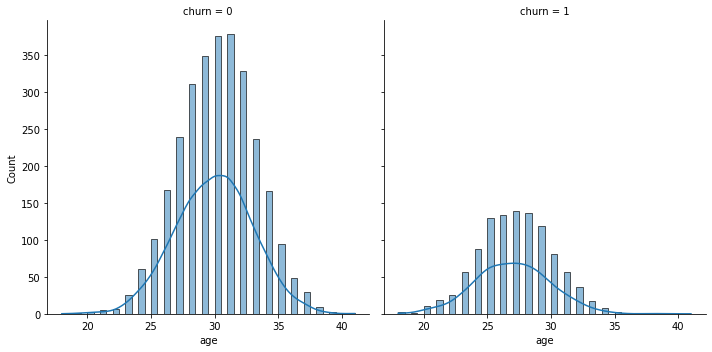

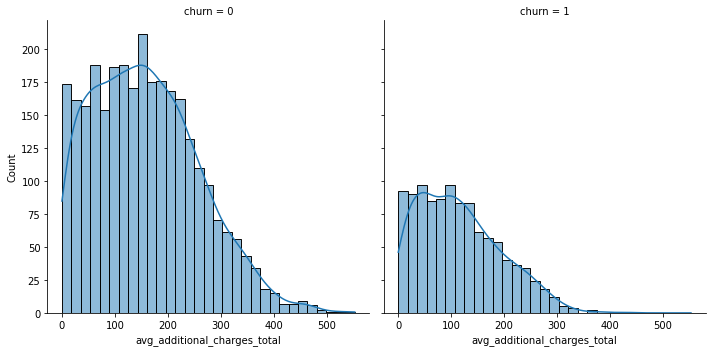

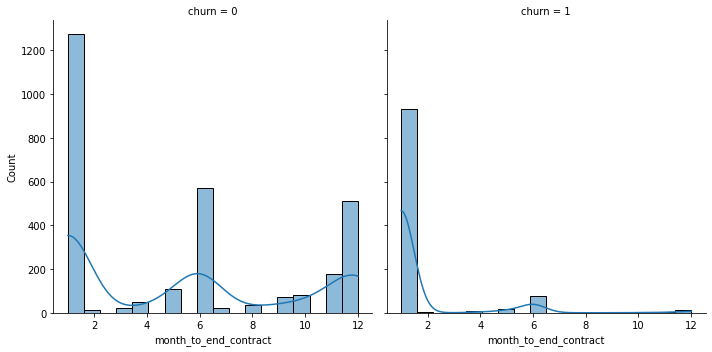

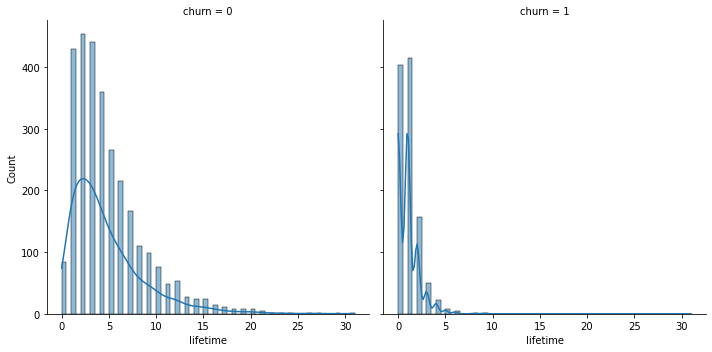

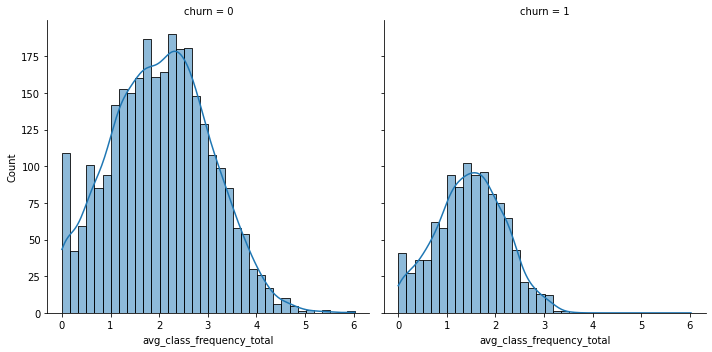

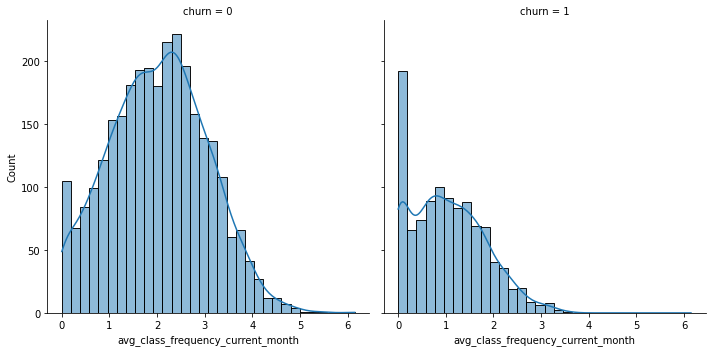

In [8]:
# построение столбчатых гистограмм и распределения признаков
for column in df.drop('churn', axis = 1).columns:
    sns.displot(df, x=df[column], col='churn', kde = True)
    plt.show()

Построим матрицу корреляций и отобразим её.

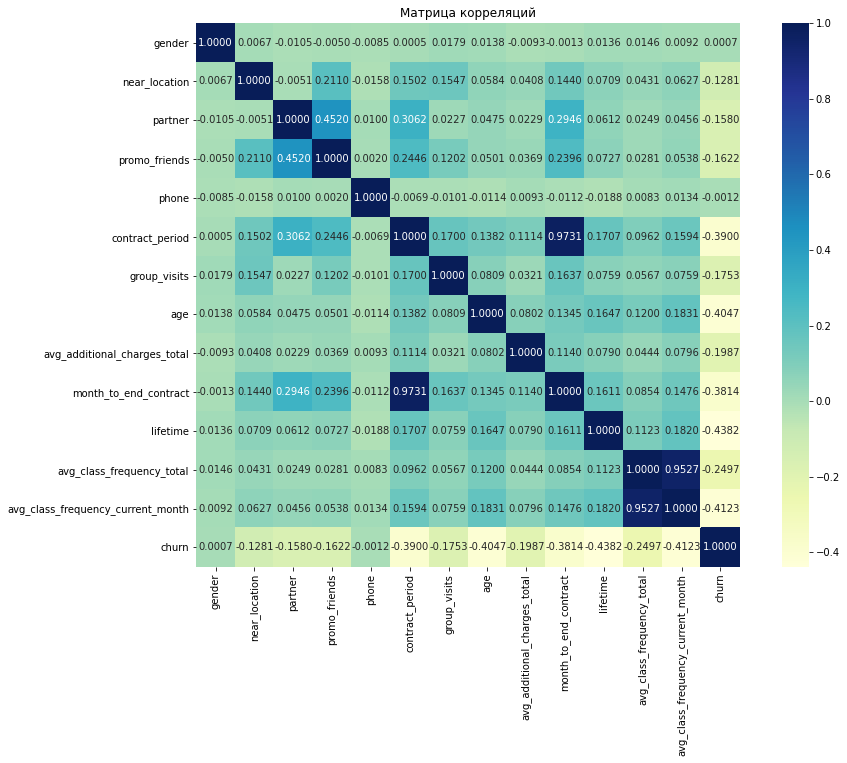

In [9]:
# корреляционная матрица
corr_m = df.corr()

# отображение корреляционной матрицы
plt.figure(figsize=(15,10))
sns.heatmap(corr_m, annot=True, square = True, fmt='.4f', cmap='YlGnBu')
plt.title('Матрица корреляций')
plt.show()

**Выводы**

* Явной зависимости факта оттока от признаков не обнаружено;
* Имеются две пары мультиколлинеарных признаков: `contract_period` - `month_to_end_contact` и `avg_class_frequency_total`	- `avg_class_frequency_current_month`. Проблема мультиколлинеарности присуща только регрессионным моделям. У нас модель классификации, в которой наоборот чем больше признаков, тем лучше. Поэтому удалять мультиколлинеарные признаки не будем.

## Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    
   - Разобъем данные на обучающую и валидационную выборку;
   - Обучим модель на train-выборке двумя способами:
      - логистической регрессией,
      - случайным лесом;
   - Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Выясним, какая модель показала себя лучше на основании метрик.

In [10]:
# разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('churn', axis = 1) 
y = df['churn']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

Обучим модель на train-выборке способом логистической регрессии.

In [11]:
# задание алгоритма для модели
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# обучение модели
lr_model.fit(X_train, y_train)

# формирование прогнозов
lr_predictions = lr_model.predict(X_test)

Обучим модель на train-выборке способом случайного леса.

In [12]:
# ззадание алгоритма для модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучение модели
rf_model.fit(X_train, y_train)

# формирование прогнозов
rf_predictions = rf_model.predict(X_test)

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели.

In [13]:
# выведение метрик
print('Метрики для модели логистической регресии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('\n')
print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для модели логистической регресии:
Accuracy: 0.93
Precision: 0.89
Recall: 0.85


Метрики для модели случайного леса:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


**Выводы**

* Доля точных ответов, точность и полнота выше у метода логистической регрессии;
* Таким образом, модель логистической регрессии показала себя лучше.

## Кластеризация пользователей

Проведем кластеризацию объектов (клиентов). Для начала стандартизируем данные и построим матрицу расстояний функцией `linkage()` на стандартизованной матрице признаков.

In [14]:
# создание нового датафрейма, без столбца с оттоком клиентов
df_st = df.drop('churn', axis=1)

# стандартизация данных
sc = StandardScaler()
x_sc = sc.fit_transform(df_st)

# построение матрицы расстояний
linked = linkage(x_sc, method = 'ward')

Построим дендрограмму.

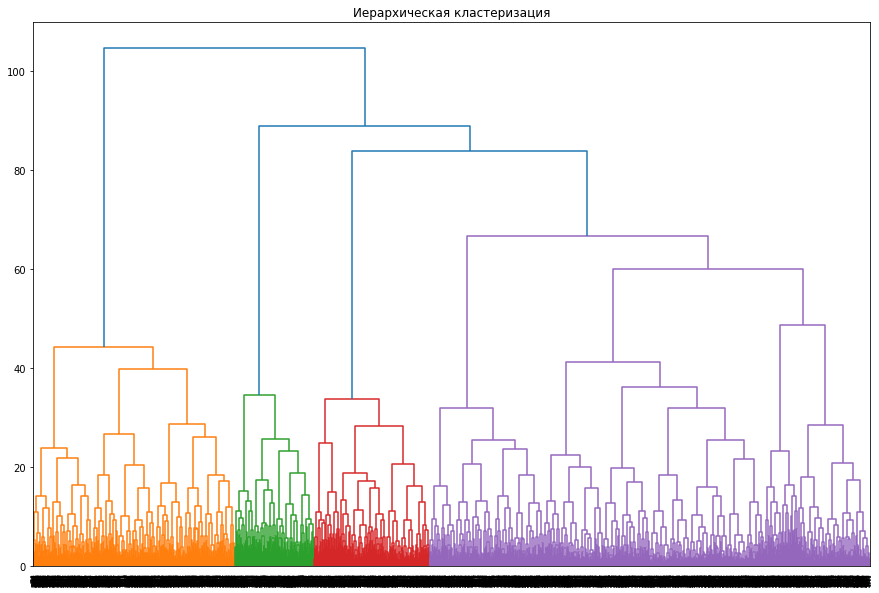

In [15]:
# построение дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

Далее нашей задачей будет:

   * Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов;
   * Построить распределения признаков для кластеров;
   * Посмотреть на средние значения признаков для кластеров и для каждого полученного кластера посчитать долю оттока.

Обучим модель кластеризации:

In [16]:
# задание модели k_means с числом кластеров 5 (по ТЗ)
km = KMeans(n_clusters = 5)

# прогнозирование кластеров для наблюдений 
labels = km.fit_predict(x_sc)

# сохранение меток кластеров в поле нашего датасета
df['cluster_churn'] = labels

# проверка
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,3
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


Посмотрим на средние значения признаков для кластеров и для каждого полученного кластера посчитаем долю оттока.

In [17]:
# вывод статистики по средним значениям признаков по кластерам
df.groupby(['cluster_churn']).mean().T

cluster_churn,0,1,2,3,4
gender,0.522078,0.484921,0.559622,0.503490,0.495050
near_location,0.862338,1.000000,0.976387,0.959123,0.000000
partner,0.470130,0.350794,0.360094,0.782652,0.463366
promo_friends,0.306494,0.238095,0.237308,0.573280,0.079208
phone,0.000000,1.000000,0.998819,1.000000,1.000000
contract_period,4.787013,1.953968,2.687131,10.923230,2.352475
group_visits,0.425974,0.341270,0.469894,0.546361,0.215842
age,29.301299,28.167460,30.109799,29.991027,28.477228
avg_additional_charges_total,143.957664,131.516081,161.594478,160.881742,135.457501
month_to_end_contract,4.475325,1.861905,2.478158,9.983051,2.198020


Построим распределения признаков для кластеров. Для категориальных признаков воспользуемся методом `sns.countplot()`, для численных - `sns.kdeplot()`.

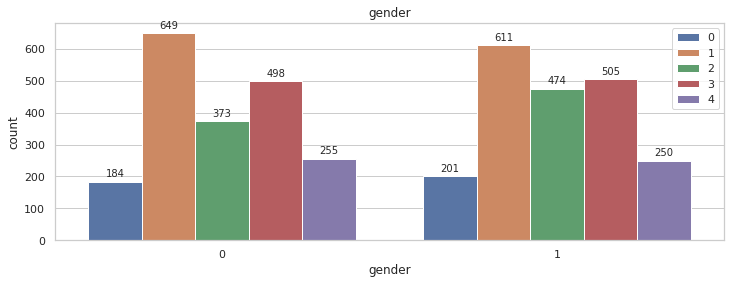

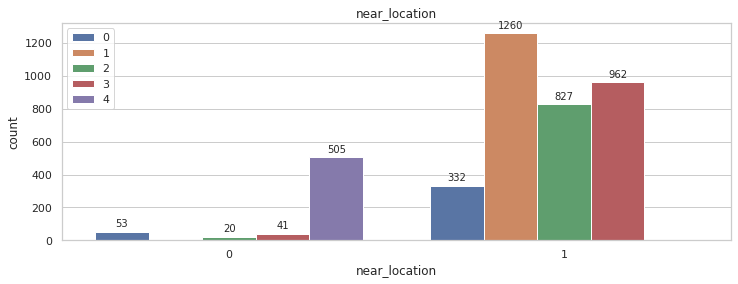

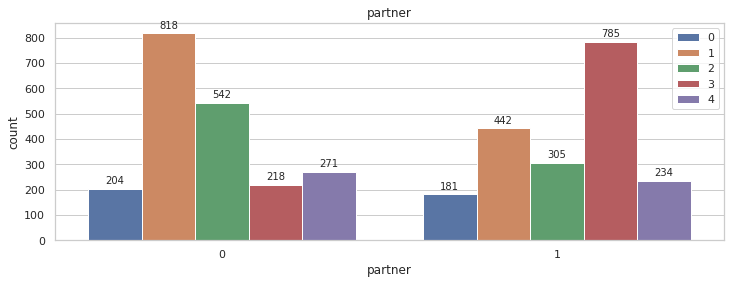

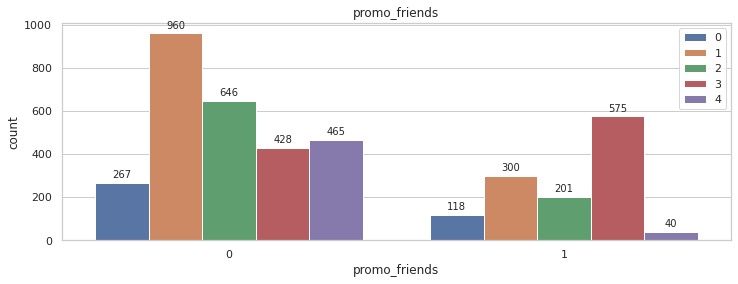

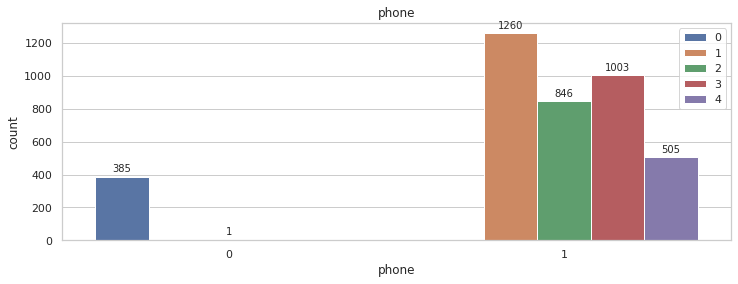

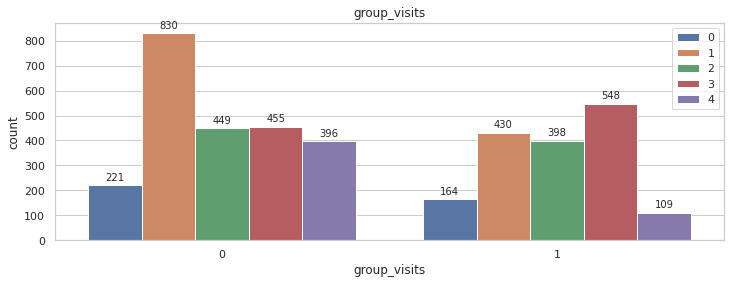

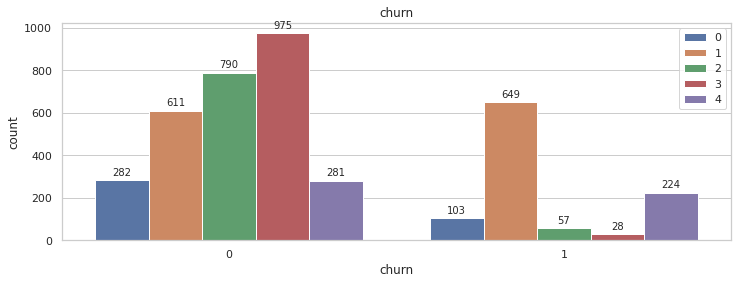

In [18]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.set_theme(style='whitegrid')
    plots = sns.countplot(x=df[column], hue='cluster_churn', data=df)
    # добавление аннотаций к графику
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                       bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    plt.title(column)
    plt.legend()
    plt.show()

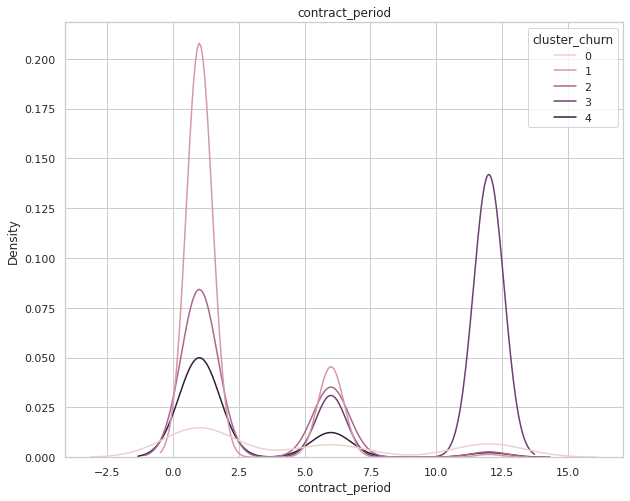

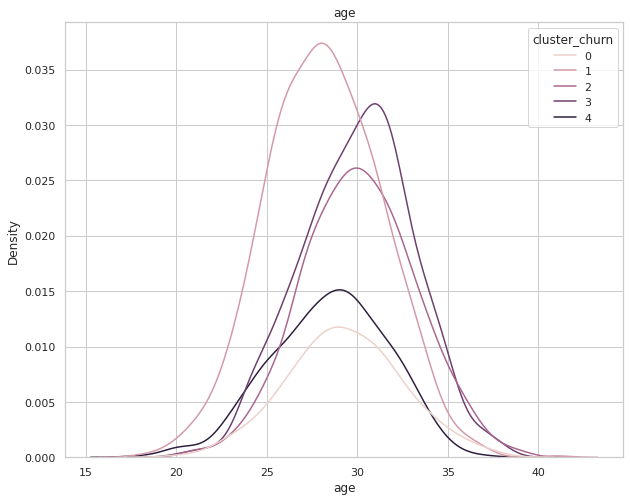

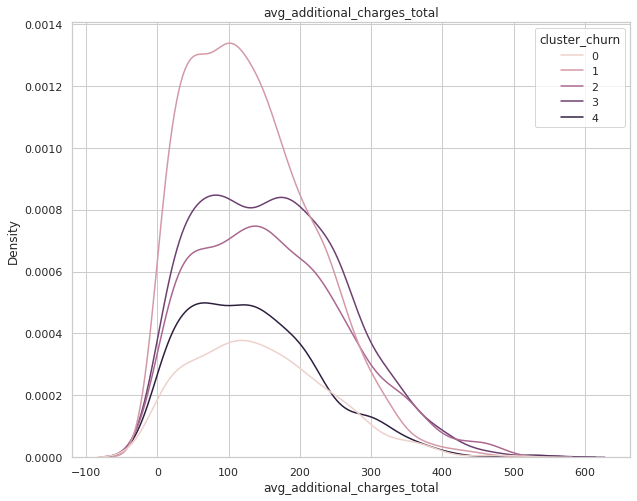

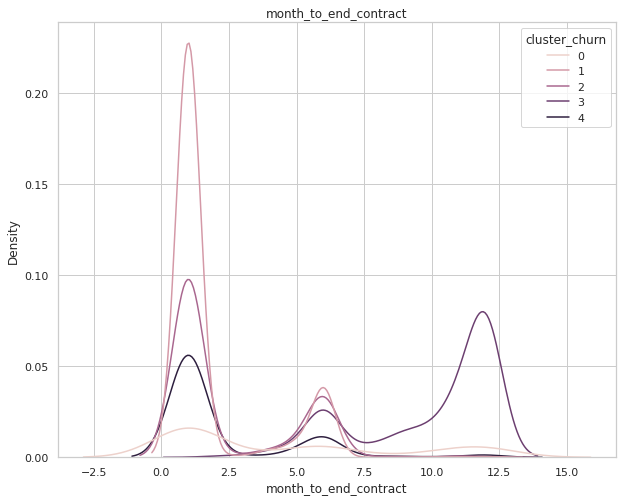

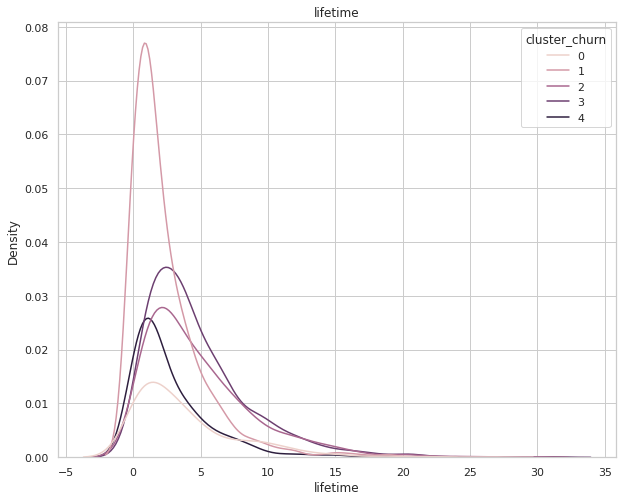

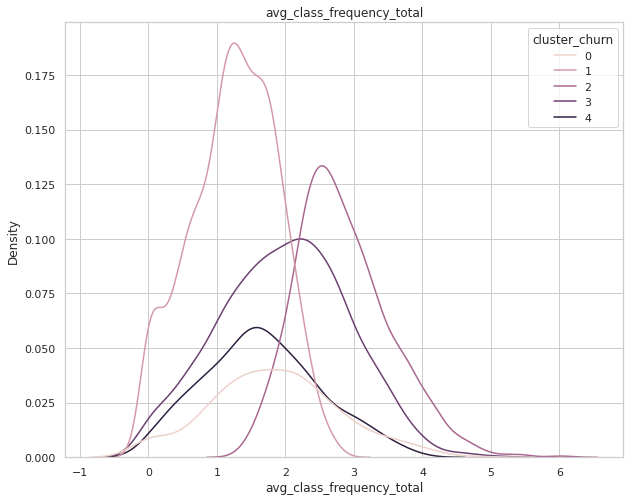

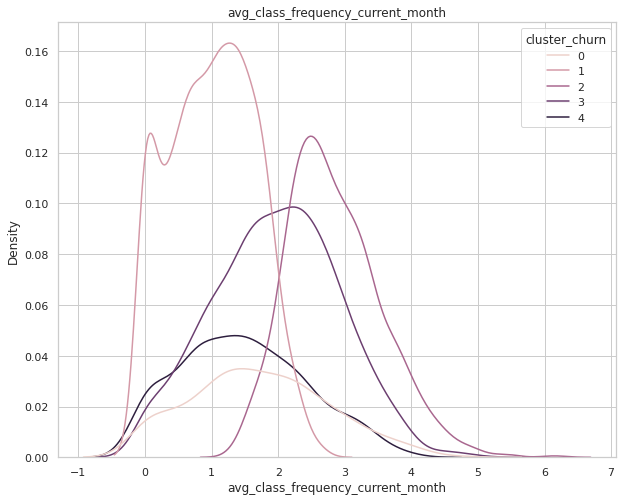

In [19]:
numerical_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
                     'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.set_theme(style='whitegrid')
    sns.kdeplot(x=df[column], hue='cluster_churn', data=df)
    plt.title(column)
    plt.show()

По результатам анализа средних значений признаков и их распределения для кластеров сформируем описание кластеров.

**Описание кластеров:**

* **Кластер 0**
    * Отток - 7%
    * Живут или работают недалеко от фитнес-центра
    * В основном обладатели недолгосрочных абонементов на 1-3 месяца
    * **Наибольшее кол-во посещений за всё время и в последний месяц**
    * Худшая группа по количеству клиентов, привлеченных по промо-акции
* **Кластер 1**
    * Отток - 44%
    * **Живут или работают далеко от фитнес-центра**
    * Реже всех посещают групповые занятия
    * Договора не на длительный срок - в среднем 2.3 месяцев
* **Кластер 2**
    * **Отток - 52% - самый высокий**
    * Живут или работают недалеко от фитнес-центра
    * Обладатели самых красткосрочных абонементов - на 1.9 месяцев
    * Меньше всего сотрудников компаний-партнеров - 35%
    * Хуже всех посещают фитнесс-клуб
* **Кластер 3**
    * Отток - 27%
    * Живут или работают недалеко от фитнес-центра
    * В среднем 4.5 месяцев контракты
    * **Нет мобильного номера**
* **Кластер 4**
    * **Отток - 3% - самый низкий**
    * Живут или работают недалеко от фитнес-центра
    * Преобладают сотрудники компаний-партнеров - 78%
    * Заключают договора на длительный срок - 11 месяцев
    * Чаще всех посещают групповые занятия - 55%
    * Чаще всех пришли по промо акции - 57%

## Выводы и рекомендации по работе с клиентами

Мы построили прогнозную модель с неплохой точностью. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту. Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено.

**Выводы по имеющимся данным:**

* Распределение по полу примерно одинаково;
* Большинство клиентов (85%) живет или работает рядом с фитнес-клубом;
* Примерно половина клиентов являются сотрудниками партнерских организаций;
* Около 30% клиентов пришли по программе "Приведи друга";
* Известны мобильные номера примерно 90% клиентов;
* Средняя длительность абонементов клиентов - 4.6 месяцев;
* Около 40% клиентов посещают групповые занятия;
* Средний возраст клиентов 29 лет;
* Средние дополнительные расходы на клиента - 146;
* Средний срок до окончания договора - 4.3 месяцев;
* Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев;
* Средняя частота посещений за все время - 1.87 раз в неделю;
* Средняя частота посещений за последний месяц - 1.76 раз в неделю;
* Доля оттока - 27%.


**Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:**

* Распределение по полу не отличается;
* Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично;
* Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты;
* Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
* Наличие мобильного номера клиента не отличается в группах;
* Средняя длительность договора больше у оставшихся пользователей, у большей части клиентов в оттоке срок договора составляет 1 месяц (это говорит о том, что чаще клиенты заключают договор на 1 месяц);
* Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них);
* У групп есть разница в среднем возрасте клиентов;
* Есть небольшое различие в выручке от других услуг фитнес-центра;
* Оставшееся время до окончания срока действия договора логично больше у оставшихся клиентов;
* У клиентов в оттоке меньше среднее количество посещений в неделю за всё время;
* Количество посещений в предыдущий месяц в два раза ниже у клиентов в оттоке.


**Рекомендации по работе с клиентами:**

Постоянные клиенты приносят больше всего дохода. На основе проведенного анализа рекомендуется:

* Настраивать таргетированную рекламу на клиентов, находящихся в непосредственной близости от фитнес-центра. Такая группа клиентов наиболее вероятно будет постоянно ходить на занятия;
* Акцентировать внимание на разнообразные групповые занятия и различные дополнительные услуги;
* Организовывать специальные предложения на абонементы длительностью от года, так как такие клиенты реже перестают ходить;
* Провести дополнительное исследование по клиентам, которые купили абонемент и ни разу не посетили фитнес-клуб. Такое исследование поможет понять, как перевести хотя бы часть из таких клиентов в категорию постоянных.